# Teorie

Povrchové napětí má směr v tečně k povrchu kapaliny/tělesa. Závisí na **teplotě**, **čistotě** a **plynu**, se kterým se kapalina stýká.

## Odtrhávací metoda

Měří se, jakou sílou je potřeba působit na tenký drátek délyk *l*, abychom jej z kapaliny dostali. Síla, kterou při těchto podmínkách působí povrchové napětí na drátek je:
$$
2F = 2 \sigma l 
$$
Sílu potřebnou k odtržení měříme pomocí torzních vah, na které pomalu přidáváme závažíčka. V momentě, kdy dojde k odtržení drátku od kapaliny zapíšeme sílu, kterou torzní váhy (spíše tedy závaží na nich) působili na drátek. Síla $P_0$, kterou působí váhy na předmět je potom rova $2F$ a povrchové napětí tedy je:
$$
\sigma = \frac{P_0}{2l} = \frac{F}{l} 
$$

Tuto sílu $P_0$ získáme z měření jako rozdíl síly potřebné k vyvážení $P_1$ a k odtržení $P_2$, tedy:
$$
P_0 = P_2 - P_1
$$

## Bonusové poznámky

Je třeba měřit teplotu roztoku mezi jednotlivými měřeními -> mísením vzniká teplo.


# Popis Měření
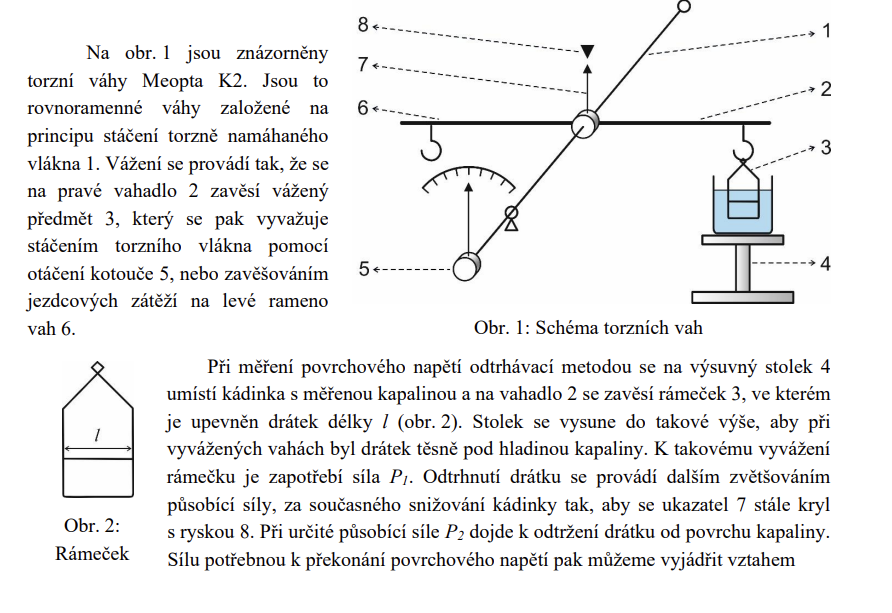
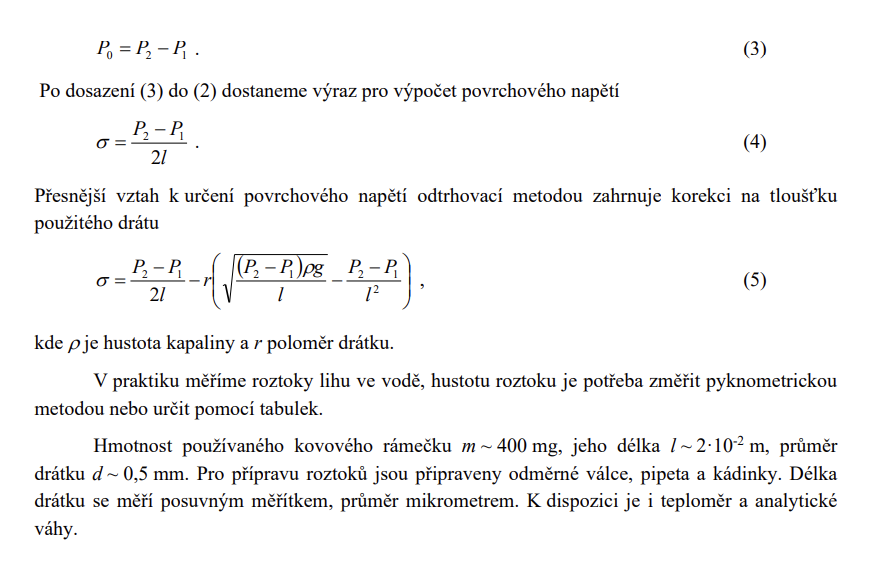

# Skript

In [1]:
import uncertainties 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
from statistics import stdev
from scipy import odr
from scipy.odr import RealData
from uncertainties import ufloat
from uncertainties.umath import *
print(Path.cwd().absolute())

C:\Users\lukso\Dropbox\Praktika I


# Počáteční podmínky
t = 23,8

Vlhkost = 38,1

p = 981 hPa

t_roztoku = 22,5

In [24]:
m_empty =  ufloat(15.1351, 5*1e-4*25)
V = ufloat(25, 5*1e-4*25)
m_array = [ufloat(36.4101,1e-4),ufloat(38.4142,1e-4),ufloat(39.5080,1e-4),ufloat(39.6075,1e-4),ufloat(39.6612,1e-4),ufloat(39.8165,1e-4)]
new_array = [(num-m_empty)/V for num in m_array]

dictionary = {"c":["3/4","1/2","1/4","1/8","1/16","1/32"], "\rho [kg \, m^{-3}]":[(x.nominal_value)*1e3 for x in new_array]}

dic = pd.DataFrame(dictionary)
with open("Tex_tables/rho.tex","w") as f:
    f.write(dic.to_latex(index_names=False, index=False,na_rep="-"))

C:\Users\lukso\AppData\Local\Temp\ipykernel_3568\168741542.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(dic.to_latex(index_names=False, index=False,na_rep="-"))


In [11]:
praktikum = "Tex_tables\IV.tex"

l_inner = np.array([2.025,2.020,2.022])*1e-2
# Error = former_error/np.square(num_of_meassurements)

d = np.array([0.81,0.80,0.82])*1e-4 # eventuálně [0.68,0.67,0.66]

d_error = np.sqrt((5*1e-6)**2 /len(l_inner)+ stdev(d*10)**2)
l_error = 5*1e-5/np.sqrt(len(l_inner))
t_error = 0.5 # °C
rho_error = 1 # kg/m-3

d = ufloat(np.mean(d),d_error)

l = ufloat(np.mean(l_inner),l_error)

print(d)

print(l)

g = ufloat(9.81,0.01)

# hustota, hmotnosti před 1-3, hmotnosti po 1-3

mess_1 = np.array([790, 24, 71, 70, 70, 169, 170, 171]) #líh

mess_8 = np.array([851,24,77,77,76,189,188,187]) #3/4 líh #36,4

mess_2 = np.array([931, 27, 77, 78, 76, 204, 203, 205]) #1/2 líh 38,4142 g na husté váze.

mess_3 = np.array([974, 27, 77, 76, 78, 249, 248, 247]) # 1/4 líh 39,5080

mess_4 = np.array([978, 25, 78, 79, 79, 291, 293,294]) # 1/8 líh 39,6075

mess_5 = np.array([981, 24, 81, 80, 81, 327,331, 329]) # 1/16 líh 39.6612

mess_6 = np.array([987, 23, 80, 79, 84, 321, 320, 324]) #1/32 39.8165

mess_0 = np.array([997, 23, 78, 79, 78, 368,372,374]) #voda

m_array = [ufloat(36.4101,1e-4),ufloat(38.4142,1e-4),ufloat(39.5080,1e-4),ufloat(39.6075,1e-4),ufloat(39.6612,1e-4),ufloat(39.8165,1e-4)]

header = ["$\rho$ [kg \, m^{3}]","t [C]", "m_b1 [mg]","m_b2 [mg]","m_b3 [mg]","m_a1 [mg]","m_a2 [mg]","m_a3 [mg]"]
print(len(header))
print(len(mess_6))

whole = {
                  "c":header,
                 "0": mess_0,
               "1/32":mess_6,
               "1/16":mess_5,
                "1/8":mess_4,
                "1/4":mess_3,
                "1/2":mess_2,
                "3/4":mess_8,
                  "1":mess_1
                                 }

dframe = pd.DataFrame(whole)

with open(praktikum,"w") as f:
    f.write(dframe.to_latex(index_names=False, index=False,na_rep="-"))
    

(8.1+/-1.0)e-05
0.020223+/-0.000029
8
8


C:\Users\lukso\AppData\Local\Temp\ipykernel_3568\1594882013.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(dframe.to_latex(index_names=False, index=False,na_rep="-"))


In [12]:
standard_m_error = 1e-6
# m_error0b = np.sqrt(stdev(dframe["0"][2:5])**2 + (1e-6**2)/3)
# m_error0a = np.sqrt(stdev(dframe["0"][5:])**2 + (1e-6**2)/3)

# m_error1b = np.sqrt(stdev(dframe["1"][2:5])**2 + (1e-6**2)/3)
# m_error1a = np.sqrt(stdev(dframe["1"][5:])**2 + (1e-6**2)/3)

# m_error2b = np.sqrt(stdev(dframe["1/2"][2:5])**2 + (1e-6**2)/3)
# m_error2a = np.sqrt(stdev(dframe["1/2"][5:])**2 + (1e-6**2)/3)

# m_error3b = np.sqrt(stdev(dframe["1/4"][2:5])**2 + (1e-6**2)/3)
# m_error3a = np.sqrt(stdev(dframe["1/4"][5:])**2 + (1e-6**2)/3)

# m_error4b = np.sqrt(stdev(dframe["1/8"][2:5])**2 + (1e-6**2)/3)
# m_error4a = np.sqrt(stdev(dframe["1/8"][5:])**2 + (1e-6**2)/3)

# m_error5b = np.sqrt(stdev(dframe["1/16"][2:5])**2 + (1e-6**2 )/3)
# m_error5a = np.sqrt(stdev(dframe["1/16"][5:])**2 + (1e-6**2 )/3)

# m_error6b = np.sqrt(stdev(dframe["1/32"][2:5])**2 + (1e-6**2)/3)
# m_error6a = np.sqrt(stdev(dframe["1/32"][5:])**2 + (1e-6**2)/3)

#error_dict = {"l":l_error,"d":np.sqrt(0.005**2 /3 + stdev(d)**2)}

sigmalol = []
real_sigma = []
sigma_error = []
real_sigma_error = []

def sigma(dm):

    haha = g* dm/(2*l)
    return(haha.nominal_value, haha.std_dev)
def sigma_real(dm,rho):
    first = g*dm/(2*l)
    #bracket = (d/2)
    bracket = (d/2)*((dm*rho* g**2 /l)**(0.5) -(dm)/(l**2) *g)
    result = first -bracket
    

    return(result.nominal_value,result.std_dev)

for column in dframe.columns:
    if column == "c":
        pass
    else:
        
        m_errorb = np.sqrt(stdev(dframe[column][2:5]*1e-6)**2 + (1e-6**2)/3)
        m_errora = np.sqrt(stdev(dframe[column][5:]*1e-6)**2 + (1e-6**2)/3)
        m1 = ufloat(np.mean(dframe[column][2:5]*1e-6),m_errorb)
        m2 = ufloat(np.mean(dframe[column][5:]*1e-6),m_errora)
        
        rhoo = ufloat(dframe[column][0],1)

        deltam = (m2-m1)        
        
        # print(np.mean(dframe[column][2:5]),np.mean(dframe[column][5:]))
        s,se = sigma(deltam)
        sr,sre = sigma_real(deltam,rhoo)

        sigmalol.append(s)
        
        # print(s)
        # print(se)
        
        real_sigma.append(sr)
        sigma_error.append(se)
        real_sigma_error.append(sre)

def quadratic_fit(x,a,b,c):
    return(a* x**2 + b*x +c)

sigmalol = np.round(np.array(sigmalol),4)*1e3
sigma_error = np.round(np.array(sigma_error),4)*1e3
real_sigma = np.round(np.array(real_sigma),4)*1e3
real_sigma_error = np.round(np.array(real_sigma_error),4)*1e3
print(sigmalol)
print(sigma_error)        
print(real_sigma)
print(real_sigma_error)

[71.1 58.4 60.2 51.9 41.5 30.8 27.  24.2]
[0.8 0.8 0.6 0.5 0.4 0.4 0.3 0.3]
[69.8 57.2 59.1 50.8 40.5 30.  26.3 23.5]
[0.8 0.9 0.6 0.5 0.4 0.4 0.4 0.4]


In [13]:
praktikum = "Tex_tables/sigma.tex"

columns_dir = {"c":["0","1/32","1/16","1/8","1/4","1/2","3/4","1"],"sigma_o":sigmalol,"s_sigma":sigma_error,"sigma_r":real_sigma,"s_sigma_r":real_sigma_error}

output = pd.DataFrame(columns_dir)

with open(praktikum,"w") as f:
    f.write(output.to_latex(index_names=False, index=False,na_rep="-"))

C:\Users\lukso\AppData\Local\Temp\ipykernel_3568\3057332372.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(output.to_latex(index_names=False, index=False,na_rep="-"))


In [14]:
def quadratic_fit(x,a,b,c):
    return(a* x**2 + b*x +c)
def cubic_fit(x,a,b,c,d):
    return(a*x**3 + b*x**2 + c*x + d)
def exponential(x,a,b):
    return(a*np.e**(x*b))
x_axis = np.array([0.,1/32,1/16,1/8,1/4,1/2,3/4,1])

y_axis1 = output["sigma_o"]
print(x_axis)
print(y_axis1)
y_axis2 = output["sigma_r"]
coeff1,err1 =  curve_fit(quadratic_fit,x_axis,y_axis1,sigma=output["s_sigma"],absolute_sigma=True)
# coeff2,err2 =  curve_fit(quadratic_fit,x_axis,y_axis2,sigma=output["s_sigma_r"],absolute_sigma=True)
coeff3,err2 =  curve_fit(exponential,x_axis,y_axis1,sigma=output["s_sigma"],absolute_sigma=True)
# coeff1 = np.polyfit(x_axis,y_axis1,3) 
# coeff2 = np.polyfit(x_axis,y_axis2,3) 
fit_x = np.linspace(0,1,100)

fit1 = exponential(fit_x,*coeff3)
fit2 = quadratic_fit(fit_x,*coeff1)

[0.      0.03125 0.0625  0.125   0.25    0.5     0.75    1.     ]
0    71.1
1    58.4
2    60.2
3    51.9
4    41.5
5    30.8
6    27.0
7    24.2
Name: sigma_o, dtype: float64


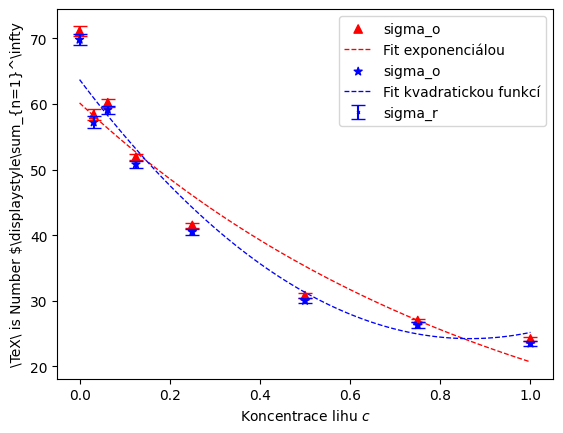

In [27]:
x_axis = [0,1/32,1/16,1/8,1/4,1/2,3/4,1]
y_axis1 = output["sigma_o"]
y_axis2 = output["sigma_r"]

plt.scatter(x_axis,y_axis1,label="sigma_o",marker="^",ls="",c="r")
plt.plot(fit_x, fit1, label="Fit exponenciálou",linestyle="--",lw=0.95,c="r")

plt.scatter(x_axis,y_axis2,label="sigma_o",marker="*",ls="",c="b")
plt.plot(fit_x,fit2, label = "Fit kvadratickou funkcí",linestyle="--",lw=0.95,c="b")
plt.errorbar(x_axis,y_axis1,yerr=output["s_sigma"],marker="x",ms=2,capsize=5,ls="",c="r",label="")

plt.errorbar(x_axis,y_axis2,yerr=output["s_sigma_r"],label="sigma_r",marker="x",ms=2,capsize=5,ls="",c="b")

plt.ylabel(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty')
plt.xlabel("Koncentrace lihu $c$")
plt.legend()
plt.savefig("Graphs/IV")

In [19]:
print(d*1e4,l*1e2)

0.81+/-0.10 2.0223+/-0.0029
